# Project Goal
### The main goal of this project is to understand the customers' satisfaction ratings to adopt the best marketing campaign.

# Exploratory Data Analysis (EDA)

### Step 1
We start by importing the proper libraries and load the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

In [9]:
train_df= pd.read_csv("trains.csv", sep=',')

### Step 2 : Understanding the Dataset

In [10]:
train_df.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


## Dataset Features
In the Trains dataset, each column represents a different feature of the train itself or related to the passengers. Let's get a deeper understanding of each feature: 

• **Satisfied**: whether the customer is satisfied  

• **Onboard General** Rating: rating from 0 to 5 about the service on board 

• **Work or Leisure**: was the travelling for work or leisure 

• **Baggage Handling Rating**: rating from 0 to 5 about the handling of the baggage 

• **Age**: the age of the customer 

• **Cleanliness Rating**: rating from 0 to 5 about the cleanliness of the train 

• **Ticket Class**: the class of the ticket 

• **Loyalty**: is part of a loyalty program? 

• **Food'n'Drink Rating**: rating from 0 to 5 about the food and bevarages on board 

• **Gender**: whether male or female 

• **Online Booking Rating**: rating from 0 to 5 about the online booking experience 

• **Ticket ID**: unique ID assigned to the travel ticket 

• **Onboard Service Rating**: rating from 0 to 5 about the service onboard 

• **Legroom Service Rating**: rating from 0 to 5 about the space for the legs 

• **Arrival Delay in Minutes**: the delay on the arrival of the train 

• **Departure Delay in Minutes**: the delay on the departure of the train 

• **Checkin Rating**: rating from 0 to 5 about the checkin experience 

• **Onboard Entertainment Rating**: rating from 0 to 5 about the onboard entertainment experience 

• **Distance**: the distance of the specific travel 

• **Boarding Rating**: rating from 0 to 5 about the boarding 

• **Onboard WiFi Rating**: rating from 0 to 5 about the WiFi service 

• **Date and Time**: of the travel 

• **Seat Comfort Rating**: rating from 0 to 5 about the comfort of the seating 

• **Track Location Rating**: rating from 0 to 5 about the track where the train has been boarded 

• **Departure Arrival Time Rating**: rating from 0 to 5 about the timing of the travel 

### Step 3: Check Data Integrity

In [11]:
# Check for missing values
missing_values = train_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64


As showned by the code, the only feature containing missimg values is the 'Arrrival Delay in Minutes'. Since addressing missing data is crucial for ensuring the accuracy and reliability of insights drawn from a dataset, understanding the nature of these missing values is essential. 
We decided to address this problem by exploiting the Python library **Missingno** is a valuable tool for visualizing and analyzing missing data within your datasets. It offers several visualizations and tools to gain insights into the presence of missing values, including:

- **Matrix Plot:** A matrix plot provides a visual representation of missing values in the dataset, allowing you to identify patterns and areas with high or low missingness.

 Missingno aids in data cleaning by highlighting columns with excessive missing values that may need to be removed or imputed.

In [12]:
import missingno as msno

<Axes: >

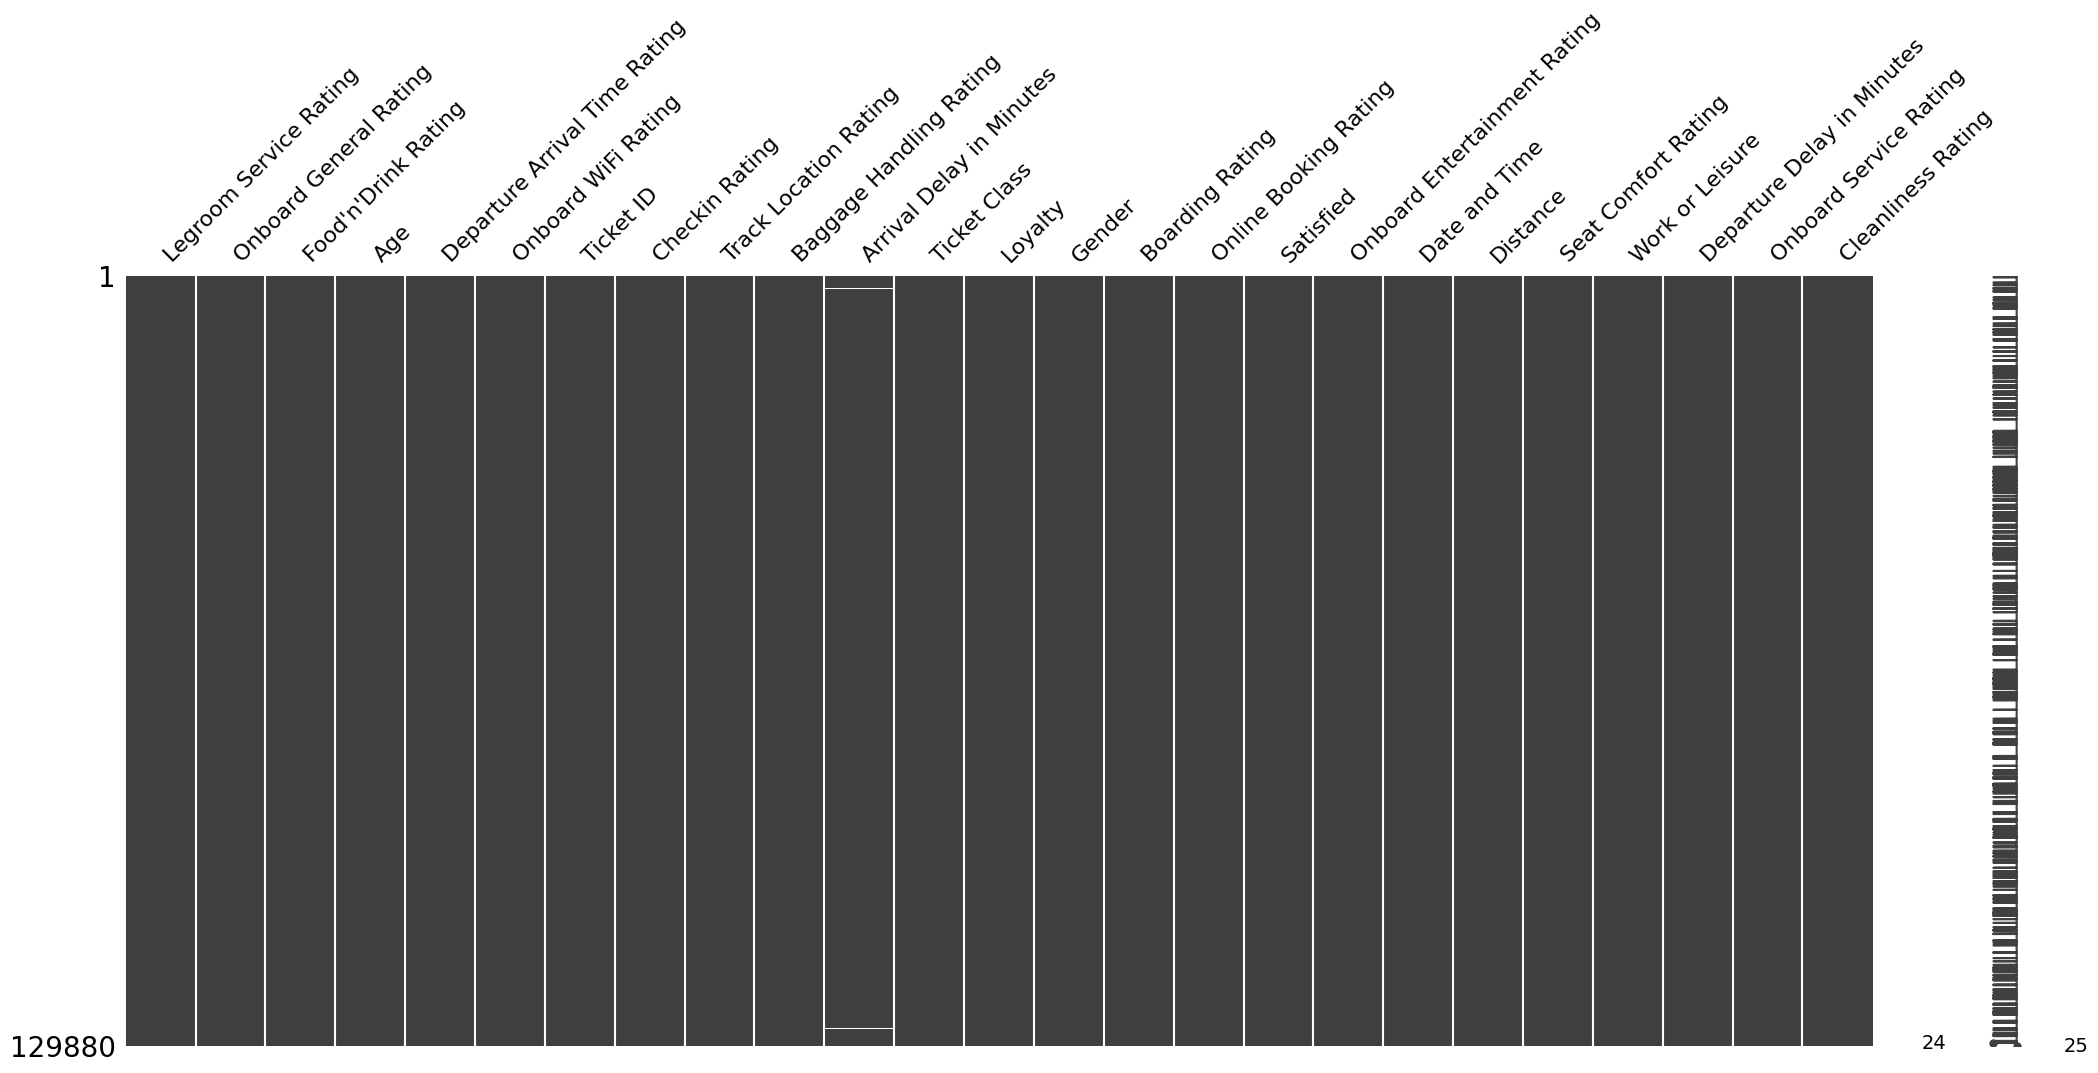

In [13]:
# matrix plot
msno.matrix(train_df)

The matrix shows us that the magnitude of the missing values of the 'Arrival Delay in Minutes' is negligible since there are only 396 missing values out of 129880. In order to highlight this consideration we proceed to further compute the percentage of the missing values. 

In [17]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(train_df)

Your selected dataframe has 25 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Arrival Delay in Minutes,393,0.3


Taking into account our previous consideration, we decided to proceed by dropping the rows corresponding to the missing values of 'Arrival Delay in Minutes', because of the marginal importance of the missing values considering the whole dataset.

In [19]:
#Drop rows with missing 'Arrival Delay in Minutes' values
dropped_delay_rows = train_df.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(train_df) - len(dropped_delay_rows)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 393
